<a href="https://colab.research.google.com/github/woojoo123/Project/blob/main/Restaurant_sentiment_analysis/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 한글폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/kakaomap_reviews.csv')
display(df)

,review,score
0,"쌀국수와 돼지고기덮밥은 맛있게 먹었음.\n코코넛쉬림프도 괜찮았는데, 크리스피롤은.....",4.0
1,무난했어요,4.0
2,곱창쌀국수 국물 진하고 맛있었어요!,4.0
3,쌀국수 맛있어요 !\n돼지갈비도 맛있는데 조금 질겨요 ㅠㅠ\n밥 추가 가능하니 밥이...,4.0
4,별점 1점 줬더니 신고먹여서 후기 삭제당한 곳\n주기적으로 별점내리러와야할거 같음,1.0
...,...,...
30192,국밥 맛있어요\n완국함^^,5.0
30193,가격과 맛이 대체로 평타임\n들깨랑 양념장 새우젓 넣어 먹긴 좋음\n개업한지 얼마 ...,3.0
30194,13:02에 도착해서 13:07에 주문했는데 13:52에 나옴\n앞에 한팀 뒤로 네...,1.0
30195,"13:07에 주문했는데 13:52에 나왔습니다.\n저희 앞에 한 팀 있었고, 뒤로 ...",1.0


# Preprocessing

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
import re

# 한글 제외한 문자 모두 제거
# \n(줄바꿈)은 공백으로 대체
df['review'] = df['review'].apply(lambda x: re.sub('[^ㄱ-ㅣ가-힣\s]', '', x.replace('\n', ' ')))

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출
df = df[df['review'].str.len() > 0]
df.head()

,review,score
0,쌀국수와 돼지고기덮밥은 맛있게 먹었음 코코넛쉬림프도 괜찮았는데 크리스피롤은내입맛엔 ...,4.0
1,무난했어요,4.0
2,곱창쌀국수 국물 진하고 맛있었어요,4.0
3,쌀국수 맛있어요 돼지갈비도 맛있는데 조금 질겨요 ㅠㅠ 밥 추가 가능하니 밥이랑 돼...,4.0
4,별점 점 줬더니 신고먹여서 후기 삭제당한 곳 주기적으로 별점내리러와야할거 같음,1.0


In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 26.1 MB/s eta 0:00:00


In [ ]:
df['score'].value_counts()

,count
score,
5.0,10735
4.0,4545
1.0,4283
3.0,3132
2.0,1810


# Keyword Analysis

In [ ]:
# 명사와 형용사 추출 함수

from konlpy.tag import Okt

def extract_keywords(text):
    tagger = Okt()
    pos = tagger.pos(text)
    return [word for word, tag in pos if tag in ['Noun', 'Adjective']]

In [ ]:
# 리뷰 데이터에서 명사와 형용사 추출

df['keywords'] = df['review'].apply(extract_keywords)
df.head()

,review,score,keywords
0,쌀국수와 돼지고기덮밥은 맛있게 먹었음 코코넛쉬림프도 괜찮았는데 크리스피롤은내입맛엔 ...,4.0,"[쌀국수, 돼지고기, 밥, 맛있게, 코코넛, 쉬, 림프, 괜찮았는데, 크리스, 피롤..."
1,무난했어요,4.0,[무난]
2,곱창쌀국수 국물 진하고 맛있었어요,4.0,"[곱창, 쌀국수, 국물, 진하고, 맛있었어요]"
3,쌀국수 맛있어요 돼지갈비도 맛있는데 조금 질겨요 ㅠㅠ 밥 추가 가능하니 밥이랑 돼...,4.0,"[쌀국수, 맛있어요, 돼지갈비, 맛있는데, 조금, 질겨, 밥, 추가, 가능하니, 밥..."
4,별점 점 줬더니 신고먹여서 후기 삭제당한 곳 주기적으로 별점내리러와야할거 같음,1.0,"[점, 점, 신고, 후기, 삭제, 곳, 기적, 점, 야할거, 같음]"


## Bar

In [ ]:
from collections import Counter

# 모든 키워드 수집
all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]

# 키워드 빈도 계산
keyword_counts = Counter(all_keywords)

# 키워드 데이터프레임 생성
keyword_df  = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

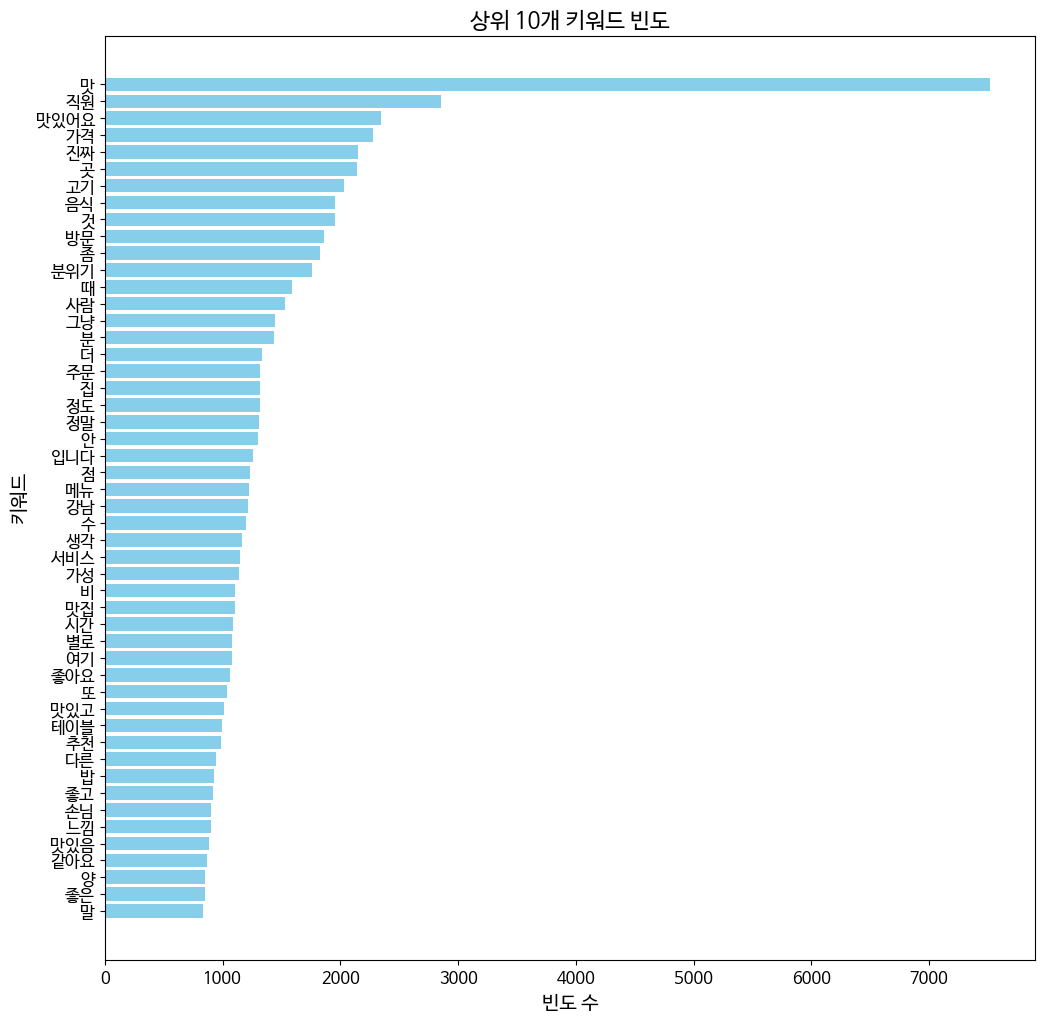

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

top_keywords = keyword_df.head(50)

plt.figure(figsize=(12, 12))
plt.barh(top_keywords['Keyword'], top_keywords['Frequency'], color='skyblue')  # 수평 막대 그래프
plt.ylabel('키워드', fontsize=14)
plt.xlabel('빈도 수', fontsize=14)
plt.title('상위 10개 키워드 빈도', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # 상위 키워드가 위에 오도록 순서 뒤집기
plt.show()

## WordCloud

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wc.generate_from_frequencies(dict(keyword_counts))  # 키워드 빈도 사용

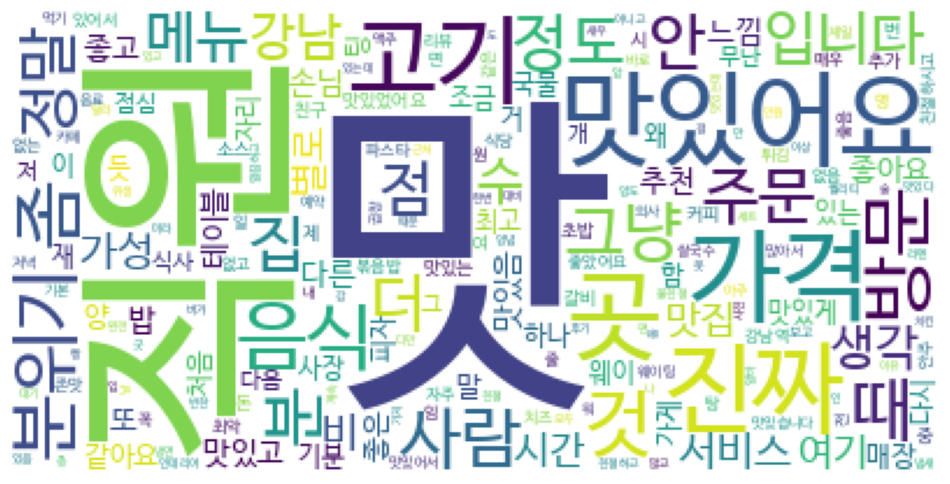

In [ ]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## Tree Map

In [ ]:
!pip install squarify

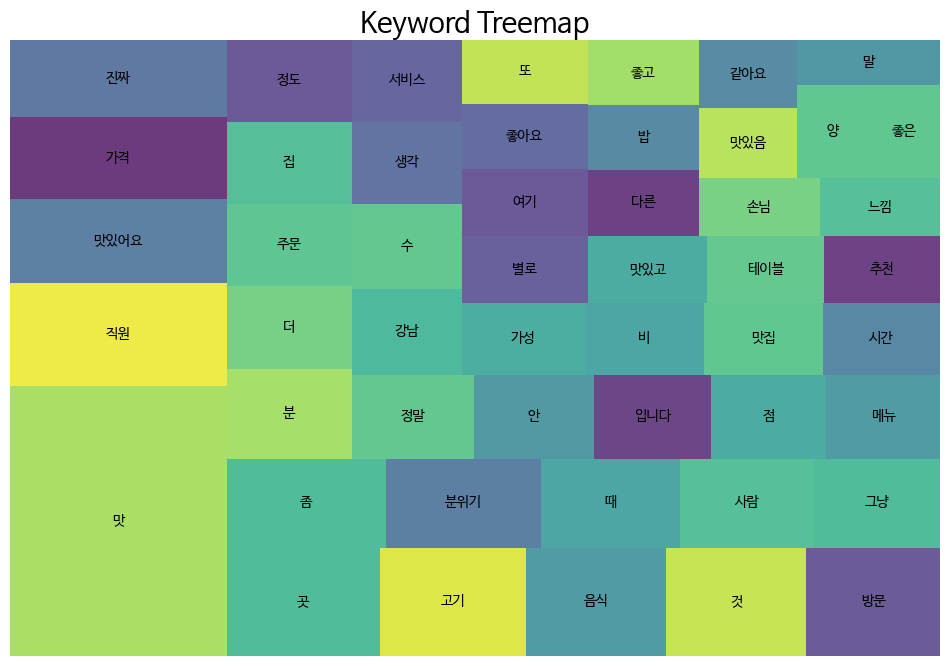

In [ ]:
import squarify

top_keywords = keyword_df.head(50) # top50개
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top_keywords['Frequency'],  # 크기 데이터
    label=top_keywords['Keyword'],    # 키워드 라벨
    alpha=0.8                         # 투명도
)
plt.axis('off')  # 축 제거
plt.title("Keyword Treemap", fontsize=20)
plt.show()

# 긍정/부정으로 분류

In [ ]:
grouped_keywords = df.groupby('score')['keywords'].sum()
grouped_keywords

,keywords
score,
1.0,"[점, 점, 신고, 후기, 삭제, 곳, 기적, 점, 야할거, 같음, 쌀국수, 이런,..."
2.0,"[이, 쌀국수, 싱겁고, 냄새, 면도, 맛없고, 곱창, 질, 기고, 냄새, 별로, ..."
3.0,"[저녁, 일찍, 웨이팅, 없었는데, 금방, 친절하고, 음식, 속도, 진짜, 빨랐는데..."
4.0,"[쌀국수, 돼지고기, 밥, 맛있게, 코코넛, 쉬, 림프, 괜찮았는데, 크리스, 피롤..."
5.0,"[맛이쩌, 근처, 볼일, 있어서, 급, 쌀국수, 방문, 유명하다는건, 역시, 맛있네..."


In [ ]:
from collections import Counter

# 평점별 자주 등장하는 키워드 추출
for score, keywords in grouped_keywords.items():
    counter = Counter(keywords)
    top_keywords = counter.most_common(10)
    print(f'평점 {score}점의 대표 키워드 : {top_keywords}')

평점 1.0점의 대표 키워드 : [('맛', 1396), ('직원', 975), ('주문', 662), ('분', 631), ('안', 605), ('음식', 599), ('진짜', 594), ('손님', 588), ('그냥', 566), ('것', 517)]
평점 2.0점의 대표 키워드 : [('맛', 934), ('가격', 303), ('직원', 264), ('별로', 246), ('그냥', 245), ('음식', 217), ('고기', 211), ('것', 210), ('좀', 195), ('안', 190)]
평점 3.0점의 대표 키워드 : [('맛', 1392), ('가격', 446), ('좀', 407), ('것', 312), ('그냥', 309), ('직원', 252), ('사람', 245), ('분위기', 244), ('무난', 238), ('곳', 232)]
평점 4.0점의 대표 키워드 : [('맛', 1461), ('가격', 526), ('좀', 493), ('맛있어요', 474), ('곳', 380), ('것', 365), ('고기', 361), ('분위기', 355), ('직원', 303), ('음식', 288)]
평점 5.0점의 대표 키워드 : [('맛', 2337), ('맛있어요', 1751), ('진짜', 1073), ('직원', 1063), ('분위기', 931), ('곳', 883), ('방문', 872), ('고기', 826), ('좋아요', 732), ('정말', 724)]


In [ ]:
from collections import Counter

# 감성 사전
positive_words = {"맛있어요", "좋아요", "정말", "분위기", "고기", "방문"}
negative_words = {"별로", "안", "그냥", "진짜", "무난"}

# 감성 점수 계산 함수 (단순 단어 리스트 대응)
def calculate_sentiment(keywords, positive_words, negative_words):
    pos_count = sum([1 for word in keywords if word in positive_words])
    neg_count = sum([1 for word in keywords if word in negative_words])
    return pos_count, neg_count

In [ ]:
for score, keywords in grouped_keywords.items():
    pos_count, neg_count = calculate_sentiment(keywords, positive_words, negative_words)
    total_count = pos_count + neg_count
    if pos_count > neg_count:
        sentiment = "긍정"
    else:
        sentiment = "부정"
    print(f"평점 {score}의 전체 감성: {sentiment} (긍정 단어 {pos_count}개, 부정 단어 {neg_count}개)")

평점 1.0의 전체 감성: 부정 (긍정 단어 1180개, 부정 단어 2224개)
평점 2.0의 전체 감성: 부정 (긍정 단어 624개, 부정 단어 833개)
평점 3.0의 전체 감성: 부정 (긍정 단어 891개, 부정 단어 980개)
평점 4.0의 전체 감성: 긍정 (긍정 단어 1848개, 부정 단어 920개)
평점 5.0의 전체 감성: 긍정 (긍정 단어 5836개, 부정 단어 1636개)


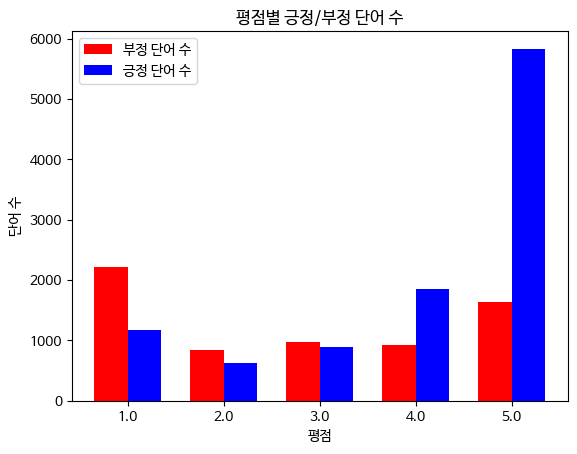

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 준비
scores = []
pos_counts = []
neg_counts = []

for score, keywords in grouped_keywords.items():
    pos_count, neg_count = calculate_sentiment(keywords, positive_words, negative_words)
    scores.append(score)
    pos_counts.append(pos_count)
    neg_counts.append(neg_count)

# 시각화
bar_width = 0.35
index = range(len(scores))
plt.bar(index, neg_counts, bar_width, label='부정 단어 수', color='red')
plt.bar([i + bar_width for i in index], pos_counts, bar_width, label='긍정 단어 수', color='blue')

plt.xlabel('평점')
plt.ylabel('단어 수')
plt.title('평점별 긍정/부정 단어 수')
plt.xticks([i + bar_width / 2 for i in index], scores)
plt.legend()

plt.show()

In [ ]:
# 4점 이상의 리뷰는 긍정 리뷰, 3점 이하의 리뷰는 부정 리뷰로 평가합니다.

df['emotion'] = df['score'].apply(lambda x: 1 if float(x) > 3 else 0)
df.head()

,review,score,keywords,emotion
0,쌀국수와 돼지고기덮밥은 맛있게 먹었음 코코넛쉬림프도 괜찮았는데 크리스피롤은내입맛엔 ...,4.0,"[쌀국수, 돼지고기, 밥, 맛있게, 코코넛, 쉬, 림프, 괜찮았는데, 크리스, 피롤...",1
1,무난했어요,4.0,[무난],1
2,곱창쌀국수 국물 진하고 맛있었어요,4.0,"[곱창, 쌀국수, 국물, 진하고, 맛있었어요]",1
3,쌀국수 맛있어요 돼지갈비도 맛있는데 조금 질겨요 ㅠㅠ 밥 추가 가능하니 밥이랑 돼...,4.0,"[쌀국수, 맛있어요, 돼지갈비, 맛있는데, 조금, 질겨, 밥, 추가, 가능하니, 밥...",1
4,별점 점 줬더니 신고먹여서 후기 삭제당한 곳 주기적으로 별점내리러와야할거 같음,1.0,"[점, 점, 신고, 후기, 삭제, 곳, 기적, 점, 야할거, 같음]",0


In [ ]:
df_emotion = df.drop(['score', 'keywords'], axis=1)
df_emotion.head()

,review,emotion
0,쌀국수와 돼지고기덮밥은 맛있게 먹었음 코코넛쉬림프도 괜찮았는데 크리스피롤은내입맛엔 ...,1
1,무난했어요,1
2,곱창쌀국수 국물 진하고 맛있었어요,1
3,쌀국수 맛있어요 돼지갈비도 맛있는데 조금 질겨요 ㅠㅠ 밥 추가 가능하니 밥이랑 돼...,1
4,별점 점 줬더니 신고먹여서 후기 삭제당한 곳 주기적으로 별점내리러와야할거 같음,0


In [ ]:
df_emotion['emotion'].value_counts()

,count
emotion,
1,15280
0,9225


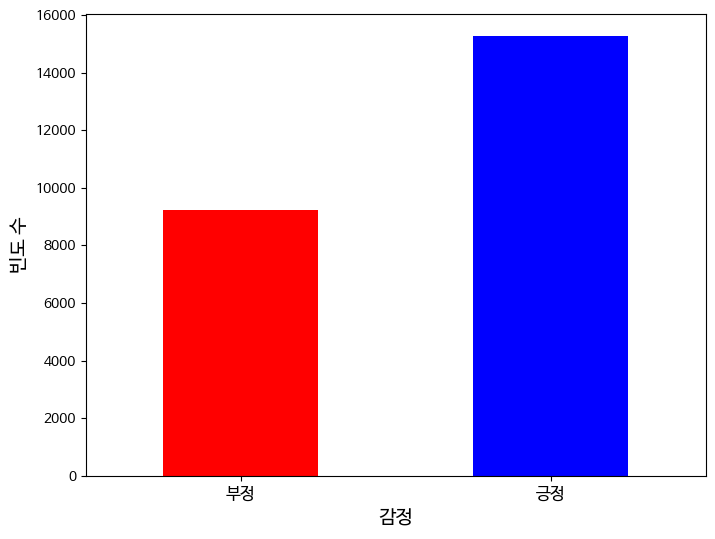

In [ ]:
emotion_counts = df_emotion['emotion'].value_counts().sort_index()
plt.figure(figsize=(8,6))
colors = ['red' if emotion == 0 else 'blue' for emotion in emotion_counts.index]
emotion_counts.plot(kind='bar', color=colors)

plt.xticks(ticks=[0,1], labels=['부정', '긍정'], fontsize=12, rotation=0)
plt.xlabel('감정', fontsize=14)
plt.ylabel('빈도 수', fontsize=14)
plt.show()

In [ ]:
total = 15280 + 9225
pos_ratio = 15280 / total  # 긍정 비율
neg_ratio = 9225 / total   # 부정 비율
print(f"긍정 비율: {pos_ratio:.2%}, 부정 비율: {neg_ratio:.2%}")

긍정 비율: 62.35%, 부정 비율: 37.65%


In [ ]:
df_emotion

,review,emotion
0,쌀국수와 돼지고기덮밥은 맛있게 먹었음 코코넛쉬림프도 괜찮았는데 크리스피롤은내입맛엔 ...,1
1,무난했어요,1
2,곱창쌀국수 국물 진하고 맛있었어요,1
3,쌀국수 맛있어요 돼지갈비도 맛있는데 조금 질겨요 ㅠㅠ 밥 추가 가능하니 밥이랑 돼...,1
4,별점 점 줬더니 신고먹여서 후기 삭제당한 곳 주기적으로 별점내리러와야할거 같음,0
...,...,...
24588,국밥 맛있어요 완국함,1
24589,가격과 맛이 대체로 평타임 들깨랑 양념장 새우젓 넣어 먹긴 좋음 개업한지 얼마 안된...,0
24590,에 도착해서 에 주문했는데 에 나옴 앞에 한팀 뒤로 네팀 있었는데 나중에 온 사람이...,0
24591,에 주문했는데 에 나왔습니다 저희 앞에 한 팀 있었고 뒤로 팀 정도 있었는데 나중에...,0


In [ ]:
df_emotion.to_csv('/content/drive/MyDrive/머신러닝 프로젝트/emotion_data.csv', index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd

df_emotion = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/data/emotion_data.csv')
df_emotion

,review,emotion
0,쌀국수와 돼지고기덮밥은 맛있게 먹었음 코코넛쉬림프도 괜찮았는데 크리스피롤은내입맛엔 ...,1
1,무난했어요,1
2,곱창쌀국수 국물 진하고 맛있었어요,1
3,쌀국수 맛있어요 돼지갈비도 맛있는데 조금 질겨요 ㅠㅠ 밥 추가 가능하니 밥이랑 돼...,1
4,별점 점 줬더니 신고먹여서 후기 삭제당한 곳 주기적으로 별점내리러와야할거 같음,0
...,...,...
24500,국밥 맛있어요 완국함,1
24501,가격과 맛이 대체로 평타임 들깨랑 양념장 새우젓 넣어 먹긴 좋음 개업한지 얼마 안된...,0
24502,에 도착해서 에 주문했는데 에 나옴 앞에 한팀 뒤로 네팀 있었는데 나중에 온 사람이...,0
24503,에 주문했는데 에 나왔습니다 저희 앞에 한 팀 있었고 뒤로 팀 정도 있었는데 나중에...,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_emotion['review']
y = df_emotion['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
okt = Okt()
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [ ]:
# 네이버에서 제공하는 한국어 형태소 분석기(Komoran)와 함께 사용하는 불용어 목록
stop_words = ["그", "이", "저", "것", "수", "그리고", "그러나", "하다", "되다", "같다", "않다", "때문", "위해", "이다"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환
tfidf_vect = TfidfVectorizer(tokenizer=okt_tokenizer,stop_words=stop_words ,ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(X_train)
tfidf_matrix_train = tfidf_vect.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환
tfidf_vect = TfidfVectorizer(tokenizer=okt_tokenizer,stop_words=stop_words ,ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(X_train)
tfidf_matrix_train = tfidf_vect.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# 감성 분석

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

lr_clf = LogisticRegression(solver='liblinear')

params = {'C' : [0.01, 0.1, 1, 10, 100]}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

lr_grid_cv = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring=scoring, refit='accuracy', verbose=1)
lr_grid_cv.fit(tfidf_matrix_train, y_train)

print(f'Best Parameters : {lr_grid_cv.best_params_}')
print(f"Best Accuracy:", {lr_grid_cv.best_score_})

# GridSearchCV 결과를 데이터프레임으로 변환
def grid_results_to_dataframe(cv_results, scoring_metrics):
    params = cv_results['params']  # 파라미터 조합
    data = {metric: cv_results[f'mean_test_{metric}'] for metric in scoring_metrics}  # 각 metric 결과

    # 데이터프레임 생성
    df_results = pd.DataFrame(data)
    df_results['params'] = params

    # 파라미터를 개별 컬럼으로 분리
    params_df = pd.DataFrame(df_results['params'].tolist())
    df_results = pd.concat([params_df, df_results.drop(columns=['params'])], axis=1)
    return df_results

# 결과를 데이터프레임으로 변환
scoring_metrics = scoring.keys()  # 사용한 scoring metrics
df_results = grid_results_to_dataframe(lr_grid_cv.cv_results_, scoring_metrics)

# 결과 출력
df_results

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters : {'C': 10}
Best Accuracy: {0.8558966587345248}


,C,accuracy,precision,recall,f1
0,0.01,0.623546,0.623546,1.000000,0.768129
1,0.10,0.765456,0.735640,0.973822,0.838135
2,1.00,0.850898,0.848187,0.926783,0.885738
3,10.00,0.855897,0.867896,0.906986,0.886994
4,100.00,0.842532,0.862332,0.889562,0.875694


accuracy, precision, f1에서 가장 높은 값을 보인 C=10인 파라미터를 선택

In [ ]:
tfidf_matrix_test = tfidf_vect.transform(X_test)

best_estimator = lr_grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print(f'accuracy : {accuracy_score(y_test, preds):3f}')
print(f'precision : {precision_score(y_test, preds):3f}')
print(f'recall : {recall_score(y_test, preds):3f}')
print(f'f1 : {f1_score(y_test, preds):3f}')

accuracy : 0.859620
precision : 0.876830
recall : 0.901505
f1 : 0.888996


AUC : 0.925


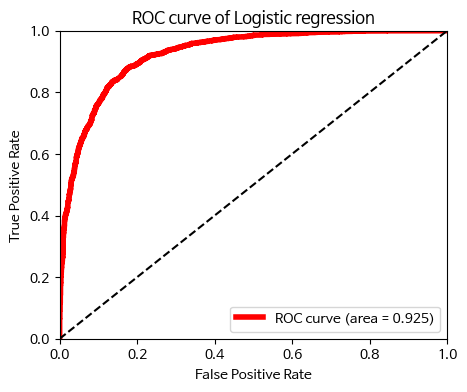

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC를 계산합니다.
y_pred_proba =  best_estimator.predict_proba(tfidf_matrix_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc,
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")
plt.show()

학습된 모델의 각 특성(feature)에 대한 가중치를 시각화하여 특성이 모델에 미치는 영향력을 확인

- 막대가 높고 양수: 해당 특성은 목표값에 긍정적인 영향을 미침.
- 막대가 낮고 음수: 해당 특성은 목표값에 부정적인 영향을 미침.
- 막대의 크기가 작음: 해당 특성은 목표값에 거의 영향을 미치지 않음.

<BarContainer object of 31810 artists>

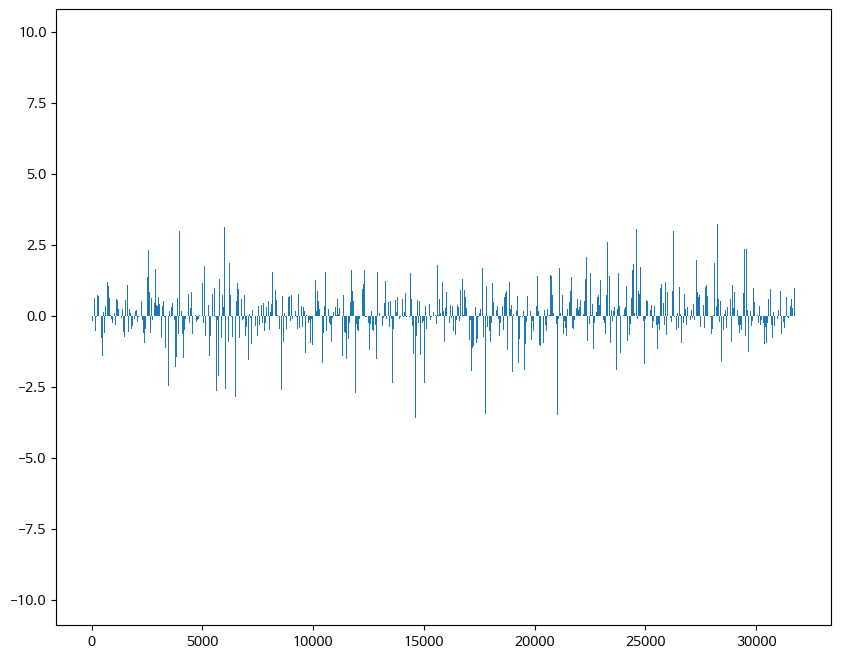

In [ ]:
# 학습한 회귀 모델의 계수를 출력합니다.

plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(best_estimator.coef_[0])), best_estimator.coef_[0])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50, 100, 150],       # 트리 개수
    'max_depth': [10, 20, 30],            # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],      # 노드 분할에 필요한 최소 샘플
    'min_samples_leaf': [1, 2, 4],        # 리프 노드에 필요한 최소 샘플
    'max_features': ['sqrt', 'log2']      # 노드에서 사용할 최대 피처
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

rf_grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, scoring=scoring, refit='accuracy', verbose=1, n_jobs=-1)
rf_grid_cv.fit(tfidf_matrix_train, y_train)

print(f'Best Parameters : {rf_grid_cv.best_params_}')
print(f"Best Accuracy:", {rf_grid_cv.best_score_})

def grid_results_to_dataframe(cv_results, scoring_metrics):
    params = cv_results['params']
    data = {metric: cv_results[f'mean_test_{metric}'] for metric in scoring_metrics}
    df_results = pd.DataFrame(data)
    df_results['params'] = params
    params_df = pd.DataFrame(df_results['params'].tolist())
    df_results = pd.concat([params_df, df_results.drop(columns=['params'])], axis=1)
    return df_results

# 결과를 데이터프레임으로 변환
scoring_metrics = scoring.keys()
df_results = grid_results_to_dataframe(rf_grid_cv.cv_results_, scoring_metrics)

df_results

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters : {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: {0.742858843549762}


,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,accuracy,precision,recall,f1
0,10,sqrt,1,2,50,0.661141,0.648750,0.995664,0.785611
1,10,sqrt,1,2,100,0.661039,0.648582,0.996155,0.785641
2,10,sqrt,1,2,150,0.661549,0.648846,0.996564,0.785963
3,10,sqrt,1,5,50,0.661345,0.648826,0.995991,0.785768
4,10,sqrt,1,5,100,0.661243,0.648702,0.996237,0.785755
...,...,...,...,...,...,...,...,...,...
157,30,log2,4,5,100,0.630229,0.627741,1.000000,0.771303
158,30,log2,4,5,150,0.630229,0.627741,1.000000,0.771304
159,30,log2,4,10,50,0.632422,0.629157,0.999836,0.772323
160,30,log2,4,10,100,0.630484,0.627902,1.000000,0.771425


In [ ]:
tfidf_matrix_test = tfidf_vect.transform(X_test)

rf_best_estimator = rf_grid_cv.best_estimator_
preds = rf_best_estimator.predict(tfidf_matrix_test)

print(f'accuracy : {accuracy_score(y_test, preds):3f}')
print(f'precision : {precision_score(y_test, preds):3f}')
print(f'recall : {recall_score(y_test, preds):3f}')
print(f'f1 : {f1_score(y_test, preds):3f}')

accuracy : 0.739645
precision : 0.714768
recall : 0.969241
f1 : 0.822778


AUC : 0.863


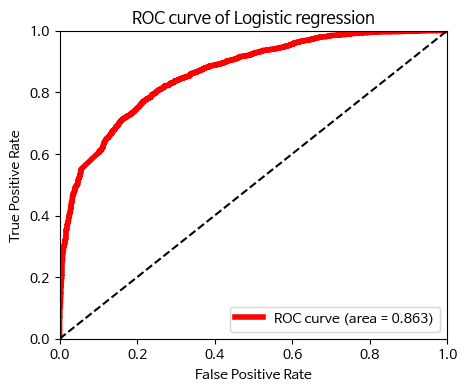

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC를 계산합니다.
y_pred_proba =  rf_best_estimator.predict_proba(tfidf_matrix_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc,
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")
plt.show()

## Ligth GBM

- 목적 함수

In [ ]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm.callback import early_stopping
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# 목적 함수 정의
def objective(params):
    # 모델 정의
    clf = LGBMClassifier(
        num_leaves=int(params['num_leaves']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42,
        n_jobs=-1  # 모든 CPU 코어 사용
    )

    callbacks = [early_stopping(stopping_rounds=150, verbose=False)]

    # 교차 검증 설정
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # 성능 기록
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_idx, valid_idx in cv.split(tfidf_matrix_train, y_train):
        X_tr, X_val = tfidf_matrix_train[train_idx], tfidf_matrix_train[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]


        # 모델 학습
        clf.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric="binary_logloss", # 학습시 사용되는 최적화 기준
            callbacks=callbacks,  # 조기 종료
        )

        # 검증 데이터 예측
        y_val_pred = clf.predict(X_val)

        # 성능 기록
        accuracy_scores.append(accuracy_score(y_val, y_val_pred))
        precision_scores.append(precision_score(y_val, y_val_pred, average='binary'))
        recall_scores.append(recall_score(y_val, y_val_pred, average='binary'))
        f1_scores.append(f1_score(y_val, y_val_pred, average='binary'))

    # 평균 성능 계산
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)

    # F1-score 기준으로 최적화
    return {
        'loss': -mean_f1,  # Hyperopt는 최소화 문제이므로 음수 F1-score
        'status': STATUS_OK,
        'accuracy': mean_accuracy,
        'precision': mean_precision,
        'recall': mean_recall,
        'f1': mean_f1
    }

In [ ]:
# 하이퍼파라미터 탐색공간

space = {
    'num_leaves': hp.quniform('num_leaves', 31, 127, 10),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.8, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.8, 1.0)
}

In [ ]:
# Hyperopt 실행
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,  # 최대 탐색 횟수
    trials=trials
)

print("Best Hyperparameters:", best)

# 전체 결과 출력
for idx, trial in enumerate(trials.trials):
    result = trial['result']
    print(f"Trial {idx + 1}: Accuracy={result['accuracy']:.4f}, Precision={result['precision']:.4f}, Recall={result['recall']:.4f}, F1={result['f1']:.4f}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
optimized_params = {
    'num_leaves': int(best['num_leaves']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'n_estimators': int(best['n_estimators']),
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'random_state': 42,
    'n_jobs': -1
}

from lightgbm.callback import early_stopping
callbacks = [early_stopping(stopping_rounds=150, verbose=True)]

final_clf = LGBMClassifier(**optimized_params)

final_clf.fit(
    tfidf_matrix_train, y_train,
    eval_set=[(tfidf_matrix_test, y_test)],
    eval_metric="binary_logloss",
    callbacks=callbacks
)

[LightGBM] [Info] Number of positive: 12224, number of negative: 7380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.508394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116725
[LightGBM] [Info] Number of data points in the train set: 19604, number of used features: 3935
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623546 -> initscore=0.504628
[LightGBM] [Info] Start training from score 0.504628
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(colsample_bytree=0.8910410799703646,
               learning_rate=0.1470993791177593, max_depth=12, n_estimators=280,
               n_jobs=-1, num_leaves=30, random_state=42,
               subsample=0.9999081820296919)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터 예측
y_test_pred = final_clf.predict(tfidf_matrix_test)

# 평가 지표 계산
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# 결과 출력
print("=== Test Data Performance ===")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

=== Test Data Performance ===
Accuracy: 0.8431
Precision: 0.8550
Recall: 0.9012
F1-Score: 0.8775


AUC : 0.915


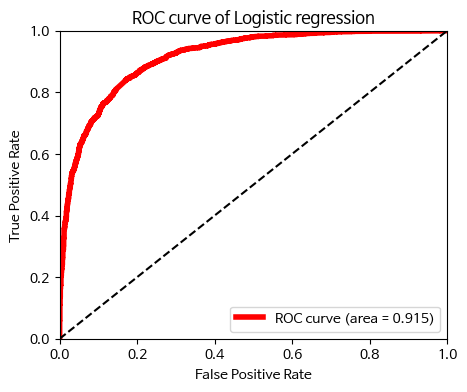

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC를 계산합니다.
y_pred_proba =  final_clf.predict_proba(tfidf_matrix_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc,
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")
plt.show()

# 모델 비교

In [ ]:
import pandas as pd

# 성능 결과를 딕셔너리로 정의
results = {
    "Model": ["Logistic Regression", "Random Forest", "LightGBM"],
    "Accuracy": [0.859620, 0.739645, 0.8431],
    "Precision": [0.876830, 0.714768, 0.8550],
    "Recall": [0.901505, 0.969241, 0.9012],
    "F1-Score": [0.888996, 0.822778, 0.8775]
}

# 딕셔너리를 데이터프레임으로 변환
df_results = pd.DataFrame(results)

# 데이터프레임 출력
display(df_results)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.859620,0.876830,0.901505,0.888996
1,Random Forest,0.739645,0.714768,0.969241,0.822778
2,LightGBM,0.843100,0.855000,0.901200,0.877500


In [ ]:
import joblib

In [ ]:
# # 모델 저장
# joblib.dump(best_estimator, '/content/drive/MyDrive/머신러닝 프로젝트/optimized_lr_model.pkl')
# joblib.dump(rf_best_estimator, '/content/drive/MyDrive/머신러닝 프로젝트/optimized_rf_model.pkl')
# joblib.dump(final_clf, '/content/drive/MyDrive/머신러닝 프로젝트/optimized_lgbm_model.pkl')

['/content/drive/MyDrive/머신러닝 프로젝트/optimized_lgbm_model.pkl']

In [ ]:
# 모델 로드
optimized_lr_model = joblib.load('/content/drive/MyDrive/머신러닝 프로젝트/optimized_model/optimized_lr_model.pkl')
# optimized_rf_model = joblib.load('/content/drive/MyDrive/머신러닝 프로젝트/optimized_rf_model.pkl')
# optimized_lgbm_model = joblib.load('/content/drive/MyDrive/머신러닝 프로젝트/optimized_lgbm_model.pkl')

In [ ]:
new_reviews = ["이 음식점은 정말 최고예요!", "별로였습니다. 다시는 안 갑니다."]
new_reviews_tfidf = tfidf_vect.transform(new_reviews)
predicted_emotions = optimized_lr_model.predict(new_reviews_tfidf)

# 1과 0을 긍정/부정으로 변환
emotion_labels = ["부정", "긍정"]  # 0 -> 부정, 1 -> 긍정
predicted_emotions_labels = [emotion_labels[pred] for pred in predicted_emotions]

# 결과 출력
for review, emotion in zip(new_reviews, predicted_emotions_labels):
    print(f"Review: {review} -> Sentiment: {emotion}")

Review: 이 음식점은 정말 최고예요! -> Sentiment: 긍정
Review: 별로였습니다. 다시는 안 갑니다. -> Sentiment: 부정


In [ ]:
new_reviews = ["처음에는 분위기가 약간 소란스러워서 걱정했지만, 직원들의 친절함과 빠른 서비스 덕분에 굉장히 만족스러운 식사를 할 수 있었습니다. 특히 스테이크는 부드럽고 완벽하게 구워져 있었고, 디저트까지 훌륭해서 꼭 다시 오고 싶다는 생각이 들었어요. 다만 음료는 약간 과하게 달아서 조금 아쉬웠습니다.",
               "이곳은 가족이나 친구들과 함께 방문하기에 정말 완벽한 장소라고 생각합니다. 내부 인테리어는 아늑하고 따뜻한 느낌을 주었으며, 무엇보다 음식의 질이 기대 이상이었습니다. 다만, 주차 공간이 조금 협소해서 조금 번거로웠던 점은 개선되면 좋을 것 같아요."]
new_reviews_tfidf = tfidf_vect.transform(new_reviews)
predicted_emotions = optimized_lr_model.predict(new_reviews_tfidf)

# 1과 0을 긍정/부정으로 변환
emotion_labels = ["부정", "긍정"]  # 0 -> 부정, 1 -> 긍정
predicted_emotions_labels = [emotion_labels[pred] for pred in predicted_emotions]

# 결과 출력
for review, emotion in zip(new_reviews, predicted_emotions_labels):
    print(f"Review: {review} -> Sentiment: {emotion}")

Review: 처음에는 분위기가 약간 소란스러워서 걱정했지만, 직원들의 친절함과 빠른 서비스 덕분에 굉장히 만족스러운 식사를 할 수 있었습니다. 특히 스테이크는 부드럽고 완벽하게 구워져 있었고, 디저트까지 훌륭해서 꼭 다시 오고 싶다는 생각이 들었어요. 다만 음료는 약간 과하게 달아서 조금 아쉬웠습니다. -> Sentiment: 긍정
Review: 이곳은 가족이나 친구들과 함께 방문하기에 정말 완벽한 장소라고 생각합니다. 내부 인테리어는 아늑하고 따뜻한 느낌을 주었으며, 무엇보다 음식의 질이 기대 이상이었습니다. 다만, 주차 공간이 조금 협소해서 조금 번거로웠던 점은 개선되면 좋을 것 같아요. -> Sentiment: 긍정
